In [ ]:
# ==============================
# 🟢 Google Colab Workflow: Global Youth Unemployment Trends (1960-2024)
# ==============================

# ------------------------------
# 1️⃣ Initial Setup
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plot styling
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
%matplotlib inline

# Load dataset (replace this with actual file or variable)
# For CSV:
# from google.colab import files
# uploaded = files.upload()
# youth_unemployment = pd.read_csv("youth_unemployment_global.csv")

# If dataset is already loaded:
# youth_unemployment variable is assumed available


## 2️⃣ Data Cleaning and Preprocessing
- Remove duplicates
- Handle missing values
- Ensure proper data types


In [ ]:
from google.colab import files
import pandas as pd

# Upload file (a dialog will pop up)
uploaded = files.upload()

# Assume your file is named "youth_unemployment_global.csv"
youth_unemployment = pd.read_csv("youth_unemployment_global.csv")

# Quick check
youth_unemployment.head()


Saving youth_unemployment_global.csv to youth_unemployment_global (1).csv


,Country,CountryCode,Year,YouthUnemployment
0,Africa Eastern and Southern,ZH,2024,13.283002
1,Africa Eastern and Southern,ZH,2023,13.367810
2,Africa Eastern and Southern,ZH,2022,13.620217
3,Africa Eastern and Southern,ZH,2021,14.955182
4,Africa Eastern and Southern,ZH,2020,14.997030


In [ ]:

# Drop duplicate rows
youth_unemployment = youth_unemployment.drop_duplicates()

# Drop rows where target is missing
youth_unemployment = youth_unemployment.dropna(subset=['YouthUnemployment'])

# Fill missing Year if any
youth_unemployment['Year'] = youth_unemployment['Year'].fillna(youth_unemployment['Year'].median())

# Ensure categorical columns are string
youth_unemployment['Country'] = youth_unemployment['Country'].astype(str)
youth_unemployment['CountryCode'] = youth_unemployment['CountryCode'].astype(str)


## 3️⃣ Long-Term Global Patterns (1960-2024)
- Plot global average youth unemployment over time


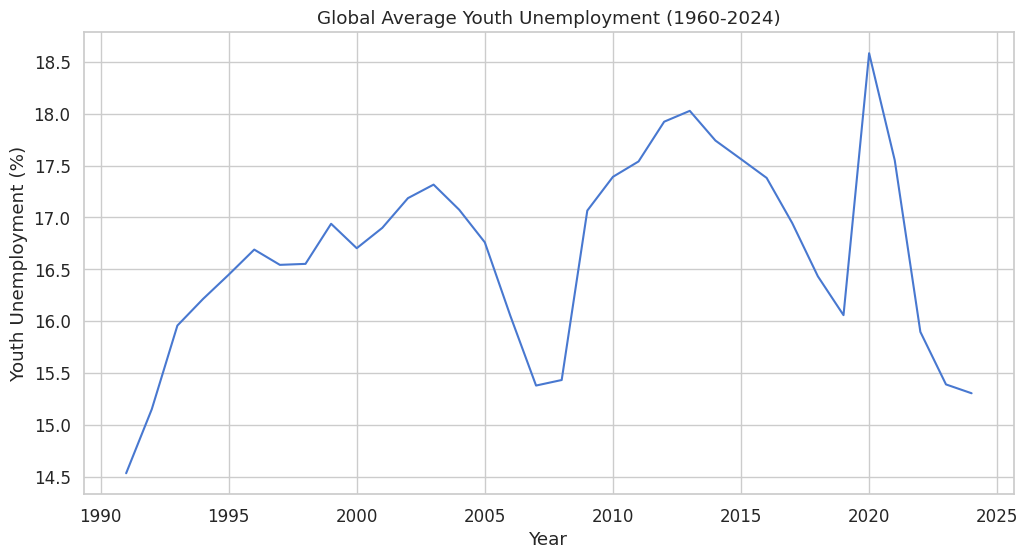

In [ ]:
# Compute global average youth unemployment per year
global_trends = youth_unemployment.groupby('Year')['YouthUnemployment'].mean().reset_index()

# Line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=global_trends, x='Year', y='YouthUnemployment')
plt.title('Global Average Youth Unemployment (1960-2024)')
plt.xlabel('Year')
plt.ylabel('Youth Unemployment (%)')
plt.show()


## 4️⃣ Decade-by-Decade Analysis
- Calculate mean unemployment per decade
- Compare changes across decades


/tmp/ipython-input-2597377534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_avg, x='Decade', y='YouthUnemployment', palette="coolwarm")


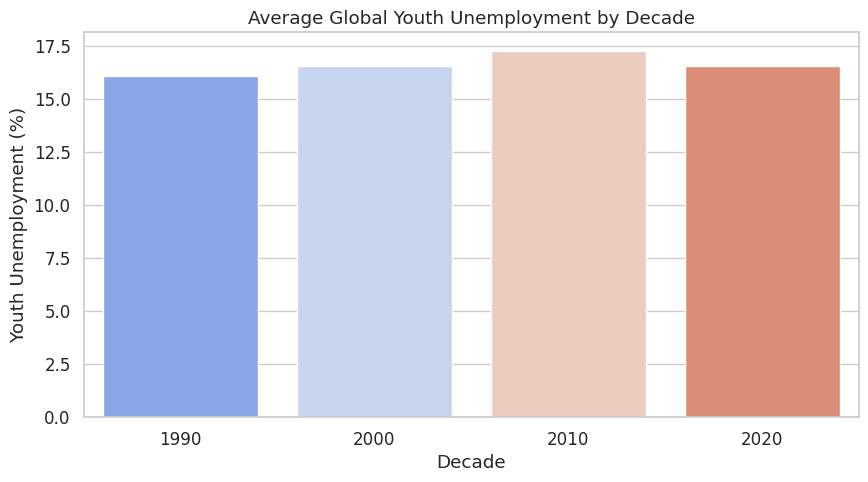

In [ ]:
# Define decade column
youth_unemployment['Decade'] = (youth_unemployment['Year'] // 10) * 10

# Compute average per decade
decade_avg = youth_unemployment.groupby('Decade')['YouthUnemployment'].mean().reset_index()

# Bar plot of average youth unemployment by decade
plt.figure(figsize=(10,5))
sns.barplot(data=decade_avg, x='Decade', y='YouthUnemployment', palette="coolwarm")
plt.title('Average Global Youth Unemployment by Decade')
plt.ylabel('Youth Unemployment (%)')
plt.show()


## 5️⃣ Recent Developments (2020-2024)
- Focus on latest trends


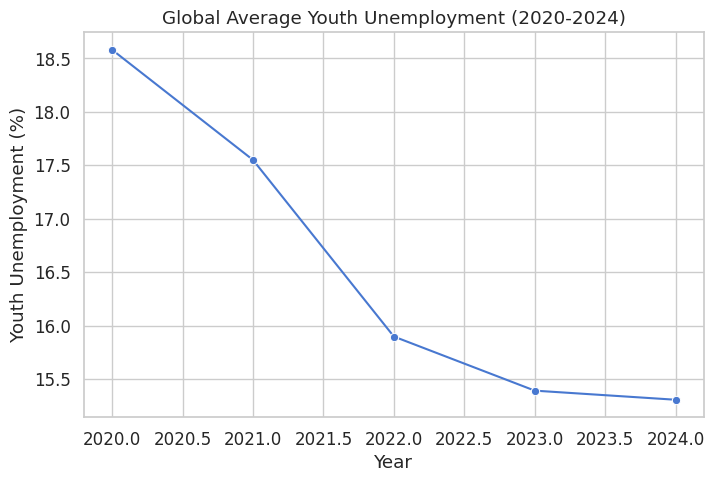

In [ ]:
recent = youth_unemployment[(youth_unemployment['Year'] >= 2020) & (youth_unemployment['Year'] <= 2024)]

# Global average each year
recent_avg = recent.groupby('Year')['YouthUnemployment'].mean().reset_index()

# Plot recent trend
plt.figure(figsize=(8,5))
sns.lineplot(data=recent_avg, x='Year', y='YouthUnemployment', marker='o')
plt.title('Global Average Youth Unemployment (2020-2024)')
plt.ylabel('Youth Unemployment (%)')
plt.show()


## 6️⃣ Statistical Trend Analysis
- Fit linear regression to global trend
- Test for trend significance


Slope: 0.0254
Intercept: -34.42
R²: 0.074
P-value: 1.1864e-01


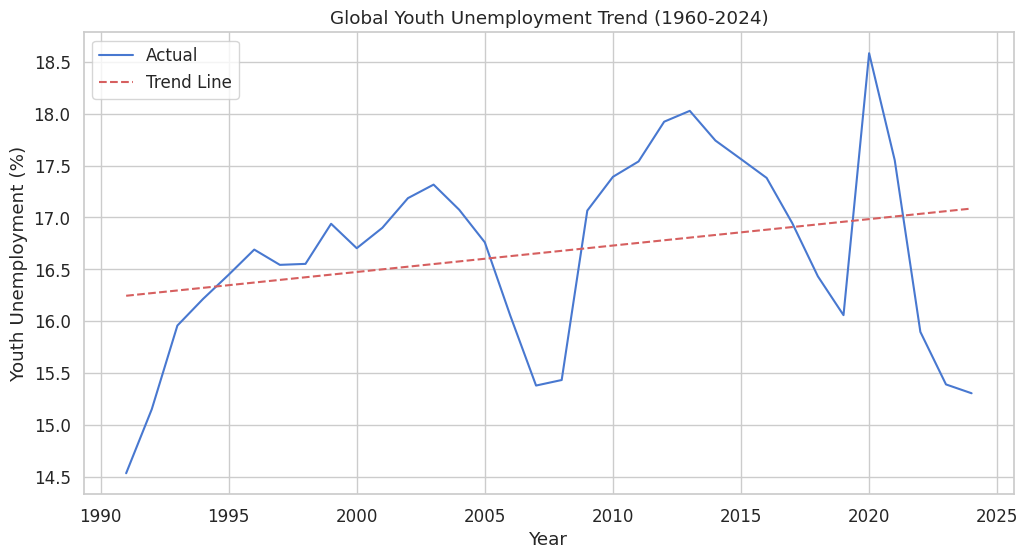

In [ ]:
# Linear regression on global average over years
slope, intercept, r_value, p_value, std_err = stats.linregress(global_trends['Year'], global_trends['YouthUnemployment'])

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"R²: {r_value**2:.3f}")
print(f"P-value: {p_value:.4e}")

# Plot with regression line
plt.figure(figsize=(12,6))
sns.lineplot(data=global_trends, x='Year', y='YouthUnemployment', label='Actual')
plt.plot(global_trends['Year'], intercept + slope*global_trends['Year'], 'r--', label='Trend Line')
plt.title('Global Youth Unemployment Trend (1960-2024)')
plt.ylabel('Youth Unemployment (%)')
plt.legend()
plt.show()


## ✅ Next Steps / Insights
- Identify decades with highest/lowest youth unemployment  
- Examine impact of major events (e.g., economic crises, pandemics)  
- Compare trends across continents or income groups  
- Extend analysis with forecasts using machine learning models  
